# Homework 3 

## Exploratory Data Analysis

### IRIS Data
We start by reading the data `IRIS.csv` and use the function `head` to see the structure of the data. 

In [1]:
iris_df <- read.csv(
    'https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv',
    fileEncoding = 'UTF-8')
head(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


From `head`, we can see that the data includes four numeric variables (`sepal_length`, `sepal_width`, `petal_length` and `petal_width`) and one string nominal variable `species`.

In this task we want to explore the following questions:

1. Is there a relationship between sepal dimensions and petal dimensions?
2. How are the sepal and petal dimensions distributed?
3. How are the different variables related to each other?

These questions will be explored by generating similar plots as those in the assignment instructions. The plots will be generated using `ggplot`, `patchwork` (to align plots) and `GGally` to generate pair-plots.

#### Question 1

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
i Please use the `legend.position.inside` argument of `theme()` instead."


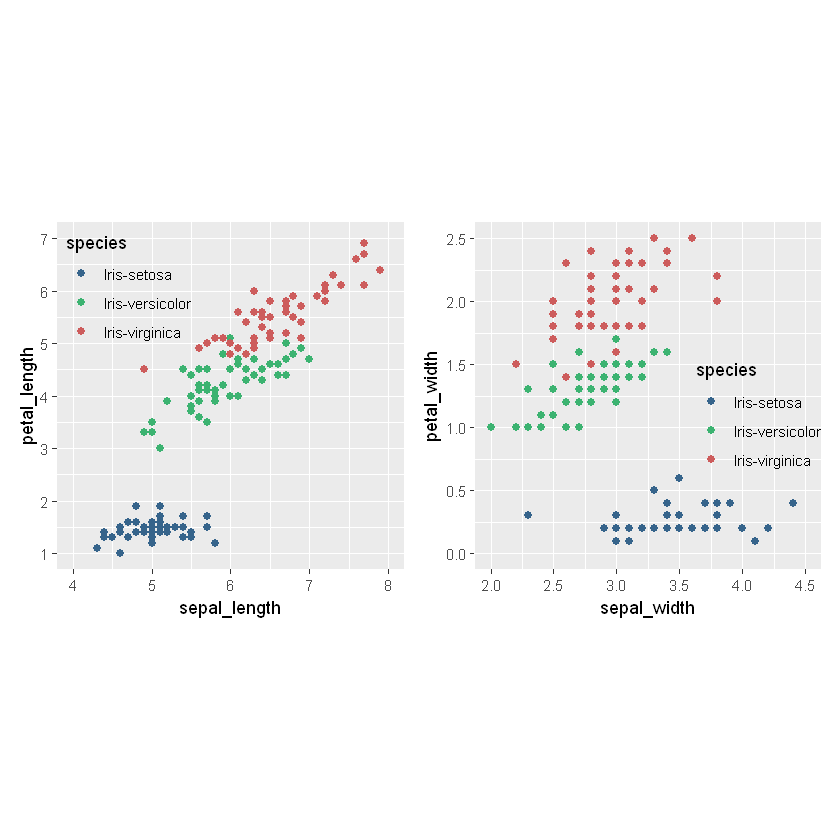

In [2]:
library(tidyverse, quietly = TRUE, warn.conflicts = FALSE)
library(patchwork)

# Adjust the colors of the points to match the ones provided. I googled for R color cheatsheet to find these (see link):
# https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf
custom_colors <- c("Iris-setosa" = "steelblue4", "Iris-versicolor" = "mediumseagreen", "Iris-virginica" = "indianred")

left_plot <- ggplot(iris_df, aes(x = sepal_length, y = petal_length, color = species)) +
    geom_point(size = 2) +
    scale_color_manual(values = custom_colors) +
    scale_x_continuous(limits = c(4, 8), breaks = seq(4, 8, 1)) +
    scale_y_continuous(limits = c(1, 7), breaks = seq(1, 7, 1)) +
    theme(
        # Adjust the position of legend to match the plot provided in the instructions
        legend.position = c(0, 1),
        legend.justification = c("left", "top"),
        # Make the legend transparent to match the plot provided in the instructions
        legend.background = element_rect(fill = "transparent"),
        legend.key = element_rect(fill = "transparent"),
        # Adjust the aspect ratio to match the plot provided in the instructions
        aspect.ratio = 1
    )

right_plot <- ggplot(iris_df, aes(x = sepal_width, y = petal_width, color = species)) +
    geom_point(size = 2) +
    scale_color_manual(values = custom_colors) +
    scale_x_continuous(limits = c(2, 4.5), breaks = seq(2, 4.5, 0.5)) +
    scale_y_continuous(limits = c(0, 2.5), breaks = seq(0, 2.5, 0.5)) +
    theme(
        legend.position = c(1.05, 0.25),
        legend.justification = c("right", "bottom"),
        legend.background = element_rect(fill = "transparent"),
        legend.key = element_rect(fill = "transparent"),
        aspect.ratio = 1
    )

left_plot + right_plot

From the figure above, there is a clear positive linear trend between between the sepal and petal dimensions for the species Versicolor and Virginica. In contrast, for Setosa, the relationship between sepal and petal dimensions does not show a noticeable trend. That is, the data indicates that there is a relationship between sepal dimensions and petal dimensions, but this relationship is species-dependent.

#### Second question

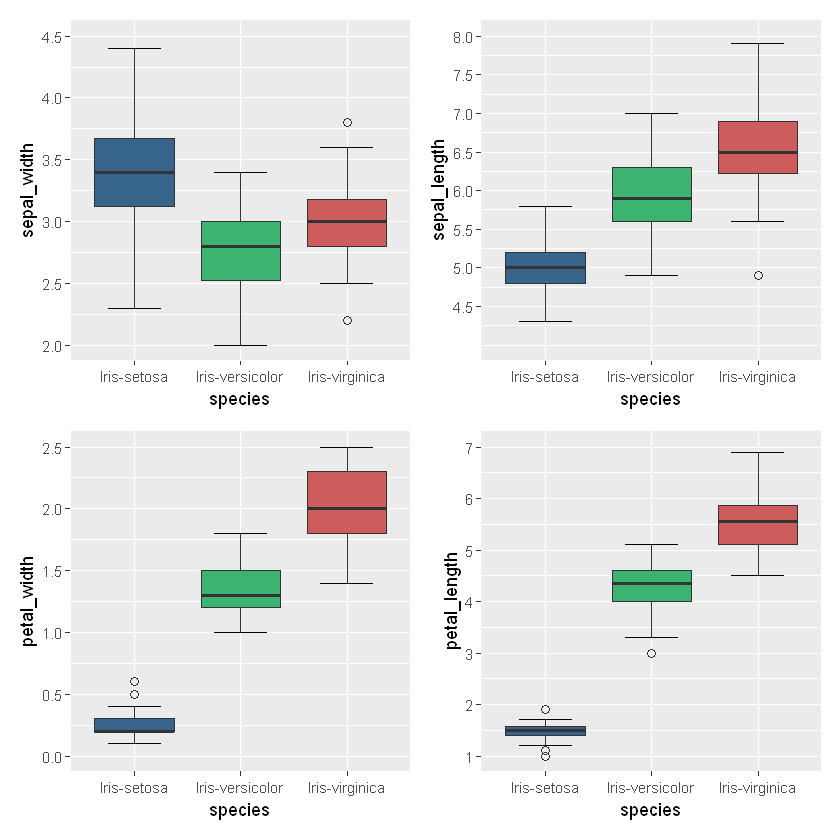

In [3]:
boxplot11 <- ggplot(iris_df, aes(x = species, y = sepal_width, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(2, 4.5), breaks = seq(2, 4.5, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot12 <- ggplot(iris_df, aes(x = species, y = sepal_length, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(4.0, 8.0), breaks = seq(4.5, 8.0, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot21 <- ggplot(iris_df, aes(x = species, y = petal_width, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(0.0, 2.5), breaks = seq(0.0, 2.5, 0.5)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot22 <- ggplot(iris_df, aes(x = species, y = petal_length, fill = species)) +
    stat_boxplot(geom = "errorbar", width = 0.5) +
    geom_boxplot(
        outlier.shape = 1,
        outlier.size = 2,
        outlier.stroke = 0.75
    ) +
    scale_fill_manual(values = custom_colors) +
    scale_y_continuous(limits = c(1, 7), breaks = seq(1, 7, 1)) +
    theme(
        legend.position = "none",
        aspect.ratio = 1
    )

boxplot11 + boxplot12 + boxplot21 + boxplot22 + plot_layout(widths = c(2, 2))

From the boxplots we see that Iris-setosa is the most distinct species, with smaller petal lengths and widths, and larger sepal widths compared to the other species. Iris-virginica dominates on all the measurements, except for sepal width. Iris-versicolor lies between the other two species all measurements, but overlaps much more with Iris-virginica.

#### Third Question

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in geom_point():
"All aesthetics have length 1, but the data has 16 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."


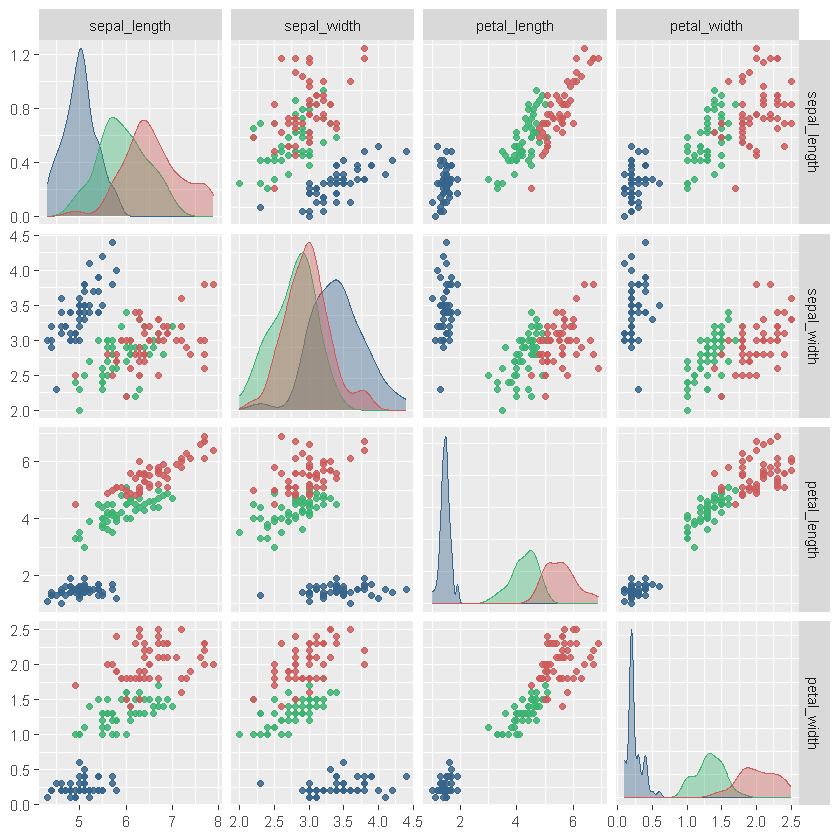

In [4]:
library(GGally)


ggpairs(iris_df,
       columns = 1:4,
       aes(color = species, fill = species),
       upper = list(continuous = wrap("points", alpha = 0.85)),
       diag = list(continuous = wrap("densityDiag", alpha = 0.4)), 
       lower = list(continuous = wrap("points", alpha = 0.85))) +
    theme(legend.position = "right") +
    scale_fill_manual(values = custom_colors) +
    scale_color_manual(values = custom_colors)

Petals dimensions are the most strongly correlated, with a distinct positive linear correlation. The sepal dimensions show weaker correlations, but are still correlated. Lastly, the plot illustrates a clear distinction between the species Iris-setosa and the other two.

## Birdwatching
Like previously, we start by reading the data and then use `head` to get a quick overview.

In [5]:
bw_df <- read.csv(
    "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv",
    encoding = "UTF-8")
head(bw_df)

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt.namn,Auktor,Antal,Ålder.stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,97785066,55235,NA,Koltrast,Turdus merula,"Linnaeus, 1758",2,NA,NA,NA,...,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Björn Lindkvist,Björn Lindkvist
2,97785067,54989,NA,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NA,NA,NA,...,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Björn Lindkvist,Björn Lindkvist
3,97785310,55235,NA,Koltrast,Turdus merula,"Linnaeus, 1758",1,NA,NA,NA,...,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson
4,97786982,54735,NA,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NA,hona,NA,...,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson
5,97786985,54944,NA,Skata,Pica pica,"(Linnaeus, 1758)",2,NA,NA,NA,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NA,NA,Henrik Spovin,Henrik Spovin
6,97786990,55232,NT,Björktrast,Turdus pilaris,"Linnaeus, 1758",10,NA,NA,NA,...,Uppland,Solna,2022-01-01,NA,2022-01-01,NA,NA,NA,Anders Eriksson,Anders Eriksson


The first task is to answer the following questions:

- What are the most prevelant species?
- What is the monthly distribution of the top 3 most prevelant species?
- What are the rarest species?

#### First Question
There are two ways to answer the question. We either take the sum over `Antal` for each specie, or we count the number of times a specie `Artnamn` has been reported. But first, we need to convert `Antal` as integer.

In [6]:
bw_df <- bw_df %>%
    mutate_at("Antal", as.integer)

Warning message:
"There was 1 warning in `mutate()`.
i In argument: `Antal = .Primitive("as.integer")(Antal)`.
Caused by warning:
! NAs introduced by coercion"


There seems to be missing values, which needs to be handled. I checked whether one column or both columns had any missing values using `any(is.na())`, which resulted in that `Antal` was the one with missing values. Furthermore, using `sum(is.na(bw_df$Antal))`, I found that there are 2329 observations in total where `Antal` is missing. Since there are a lot of missing values, we count the number of times `Artnamn` appears in the dataset instead.

In [7]:
bw_counts <- bw_df %>%
    select(Artnamn) %>%
    group_by(Artnamn) %>%
    summarize(count = n(), .groups = "drop") %>%
    arrange(desc(count))

head(bw_counts)

Artnamn,count
<chr>,<int>
Koltrast,718
Talgoxe,631
Blåmes,629
Gräsand,531
Storskrake,522
Sothöna,513


From above, we see that Koltrast is the most prevelant specie that is being reported.

#### Second Question
We start by fetching the top three most prevelant species from `bw_counts`.

In [8]:
top_species <- bw_counts %>%
    top_n(3, count) %>%
    pull(Artnamn)

Next step is to add a `Month` column, which we define as the midpoint between `Startdatum` and `Slutdatum`. This can be done by converting `Startdatum` and `Slutdatum` into date format using the library `lubridate`, and then using `Mutate`. 

In [9]:
library(lubridate)

bw_df <- bw_df %>%
    mutate(
        Startdatum = as.Date(Startdatum, format = "%Y-%m-%d"),
        Slutdatum = as.Date(Slutdatum, format = "%Y-%m-%d"),
        Midpoint = Startdatum + (Slutdatum - Startdatum) / 2
    )

bw_df <- bw_df %>%
    mutate(Month = month(Midpoint, label = TRUE, abbr = TRUE))

Next step is to create a subset of the dataset, which we will use to visualize the distribution.

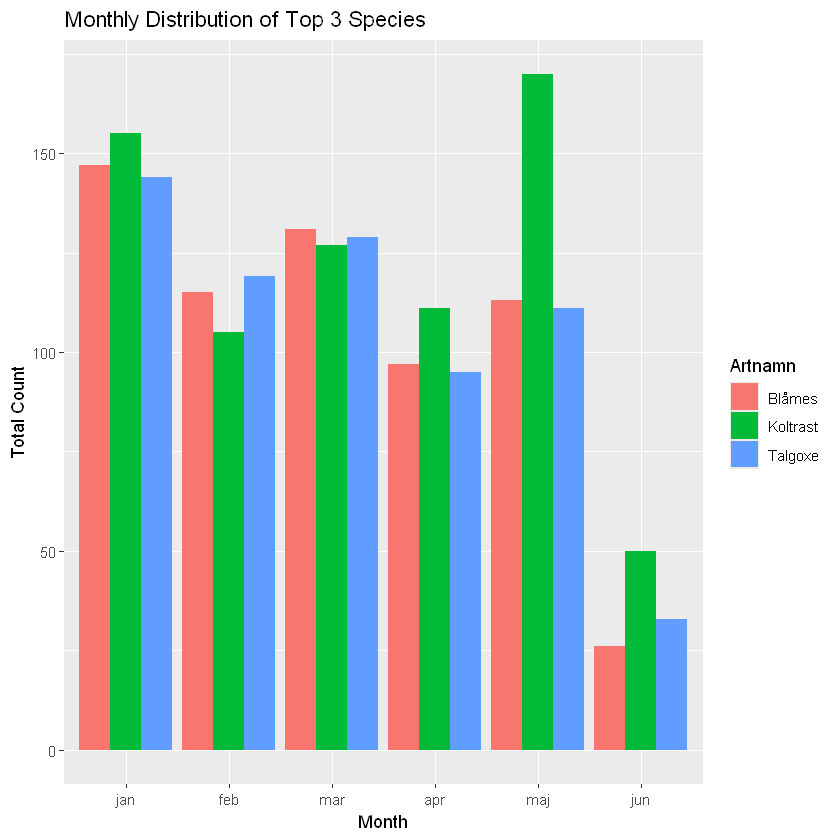

In [10]:
monthly_distr <- bw_df %>%
    filter(Artnamn %in% top_species) %>%
    group_by(Artnamn, Month) %>%
    summarize(count = n(), .groups = "drop") %>%
    arrange(Artnamn, Month)

ggplot(monthly_distr, aes(x = Month, y = count, fill = Artnamn)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Monthly Distribution of Top 3 Species",
        x = "Month", y = "Total Count")

#### Third Question
After some investigation using `filter(count <= 1)`, I found that there are a total of 35 species that has only been reported once in the dataset. We can display these species using `pull()`.

In [11]:
rarest_species <- bw_counts %>%
    filter(count <= 1) %>%
    pull(Artnamn)

rarest_species

[1] "Bivråk"                    "Bändelkorsnäbb"           
 [3] "Doppingfåglar"             "Ejder"                    
 [5] "Fiskgjuse"                 "Fjällvråk"                
 [7] "Forsärla"                  "Gravand"                  
 [9] "Gråhakedopping"            "Knipskrake"               
[11] "Kustlabb"                  "Lappsparv"                
[13] "Ljungpipare"               "Mellanskarv"              
[15] "Måsfåglar"                 "Nordlig gulärla"          
[17] "Ob. bo-/bergfink"          "Ob. fisk-/silvertärna"    
[19] "Ob. gås"                   "Ob. korsnäbb"             
[21] "Ormvråk, underarten buteo" "Prutgås"                  
[23] "Rosenfink"                 "Röd glada"                
[25] "Rödbena"                   "Spetsbergsgås"            
[27] "Spillkråka"                "Storlom"                  
[29] "Strömstare"                "Tornfalk"                 
[31] "Trädlärka"                 "Tundrasädgås"             
[33] "Varfågel"                  "Vinterhämpling"           
[35] "Ägretthäger"

The next task is to generate three questions of our own choice, and explore the dataset by answering the questions. The first question I want to explore is the following:

- What species are most commonly reported during summer?

First, we need to establish when summer is. A subjective take (my personal definition), is that summer is during the period June-August. We can now count the number of times a specie has been reported during this time period.

In [12]:
bw_summer <- bw_df %>%
    mutate(Month = month(Startdatum, label = TRUE, abbr= TRUE)) %>%
    filter(Month %in% c("jun", "jul", "aug"))

summer_counts <- bw_summer %>%
    select(Artnamn, Month) %>%
    group_by(Artnamn) %>%
    summarize(count = n(), .groups = "drop") %>%
    arrange(desc(count))

head(summer_counts, 3)

Artnamn,count
<chr>,<int>
Mindre flugsnappare,55
Svartvit flugsnappare,54
Koltrast,50


The analysis shows that ***Mindre flugsnappare***, ***Svartvit flugsnappare***, and ***Koltrast*** are the most commonly reported species during the summer months. These species are active breeders or migrants returning to Sweden to breed, which highlights seasonal patterns in bird activity and their visibility during this period. 

The second question we will explore is the following

- Who are the most active reporters in this dataset, and how many unique species have they reported?

To explore the question above, we group by `Rapportör`, and then count all the unique species each reporter has contributed as well as counting the total number of reports. 

In [13]:
reporter_activity <- bw_df %>%
    group_by(Rapportör) %>%
    summarize(unique_species_count = n_distinct(Artnamn),
              total_sightings = n(),
              .groups = "drop") %>%
    arrange(desc(unique_species_count))

head(reporter_activity, 10)

Rapportör,unique_species_count,total_sightings
<chr>,<int>,<int>
Svante Söderholm,143,5428
Björn Lindkvist,100,220
Ari Määttä,99,519
Adrian Trost,96,564
Folke K Larsson,94,1029
Henrik Spovin,91,498
jesper sollerman,90,954
Magnus Edberg,85,693
Erik Jonsson,84,330


The table above, reveals several key insights. Firstly, ***Svante Söderholm*** is a clear contributor, reporting the highest number of unique species and total sightings, accounting for roughly one-quarter of all observations. This highlights his significant influence on the dataset. Furthermore, there are some variation in reporting pattern. Some top contributors, like ***Erik Jonsson*** have reported a large amount of unique species but has a relatively low total sightings, suggesting a focus on quality or niche observations. Whilst others, like ***Jesper Sollerman***, appears to emphasize heavily on contributing large volumes of data, with fewer unique species but a high overall number of sightings.

Finally, we explore the question:

- Are any of the rarest observed specie red-listed?

First, we check for all unique entries in the column `Rödlistade`.

In [14]:
unique(bw_df$Rödlistade)

[1] NA   "NT" "VU" "EN"

As we can see the dataset only includes at most endangered species (denoted EN). Next, we create a subset that includes the rarest species who are red-listed. To do this, we start by fetching all species with counts $\leq 1$, and then we use `filter` to fetch all rarest species that are endangered.

In [15]:
rl_rarest_species <- bw_df %>%
    select(Artnamn, Rödlistade) %>%
    filter(Artnamn %in% rarest_species, !is.na(Rödlistade)) %>%
    distinct(Artnamn, .keep_all = TRUE)

rl_rarest_species

Artnamn,Rödlistade
<chr>,<chr>
Fjällvråk,NT
Vinterhämpling,VU
Spillkråka,NT
Lappsparv,VU
Ejder,EN
Gravand,NT
Kustlabb,NT
Rosenfink,NT


Eight out of the 35 species reported only once are red-listed, representing approximately 23% of the rarest observed species. This highlights the overlap between rarity in observations and conservation risk. Furthermore, this finding is significant as it underscores how rare observations can serve as indicators of species under threat.

### Predicting Strokes
To explore `stroke-data`, we start by understanding the structure of the data.

In [16]:
stroke_df <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv', fileEncoding = "UTF-8")
str(stroke_df)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : chr  "Male" "Female" "Male" "Female" ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr  "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : chr  "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In order to generate some serious questions, we start by exploring a baseline questio

- What type of variation occurs within the variables?

This will gain more familiarity with the data, which lead to more serious questions. We choose some potential key factors such as `age`, `bmi` and `avg_glucose_level` and analyze the variation.

      age        avg_glucose_level      bmi       
 Min.   : 0.08   Min.   : 55.12    Min.   :10.30  
 1st Qu.:25.00   1st Qu.: 77.07    1st Qu.:23.50  
 Median :44.00   Median : 91.68    Median :28.10  
 Mean   :42.87   Mean   :105.31    Mean   :28.89  
 3rd Qu.:60.00   3rd Qu.:113.57    3rd Qu.:33.10  
 Max.   :82.00   Max.   :271.74    Max.   :97.60  

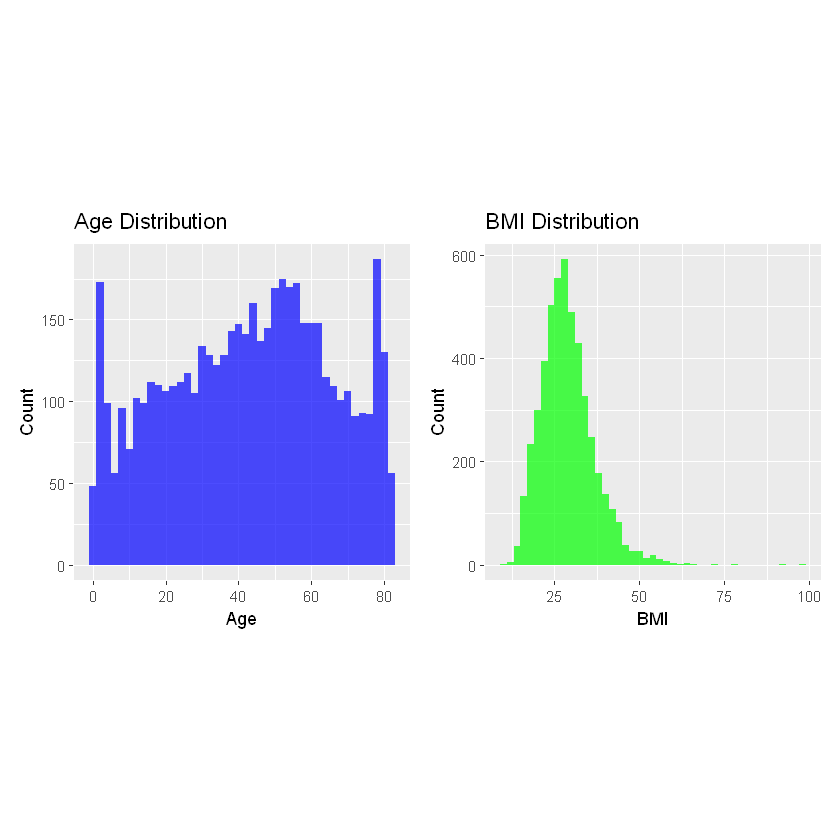

In [17]:
summary_stats <- stroke_df %>%
    select(age, avg_glucose_level, bmi) %>%
    filter(bmi != "N/A") %>%
    mutate(bmi = as.numeric(bmi)) %>%
    summary()

summary_stats

age_plot <- ggplot(stroke_df, aes(x = age)) +
    geom_histogram(bins = 20, binwidth = 2, fill = "blue", alpha = 0.7) +
    labs(title = "Age Distribution", x = "Age", y = "Count") +
    theme(aspect.ratio = 1)

stroke_df_clean <- stroke_df %>% 
    filter(bmi != "N/A") %>%
    mutate(bmi = as.numeric(bmi))

bmi_plot <- ggplot(stroke_df_clean, aes(x = bmi)) +
    geom_histogram(bins = 20, binwidth = 2, fill = "green", alpha = 0.7) +
    labs(title = "BMI Distribution", x = "BMI", y = "Count") +
    theme(aspect.ratio = 1)

age_plot + bmi_plot

There is a large proportion of older individuals in the dataset, which should be the case when focusing one stroke-related analysis. However, the distribution seem to peak at both ends of the tails. This suggests that strokes may occur across all age groups but are more prevalent among older individuals. 

- How does age influence the likelihood of stroke occurence?

BMI seems to follow a right-skewed distribution, with most values clustered between the interval 20 and 40. The mean BMI is 28.89, which is considered overweight based on Wikipedia. Also, we can observe extreme outliers in BMI, with values as high as 97.6. These observations could indicate that the individuals in this dataset are likely overweight, which could be an important risk factor for stroke occurances.

- How does BMI influence the likelihood of stroke occurence?

The mean glucose level 105.31 is slightly higher than the median, indicating a slight right skew. This could indicate that the dataset may include individuals with high blood sugar levels, which could potentially be a risk factor for stroke occurances.

- Do higher glucose levels increase the risk of stroke occurence?

We now have three more refined questions to explore.

#### Age and Stroke Occurance
First, we categorize individuals based on their age (e.g., children, middle-aged, elderly). Then we calculate stroke rates for each group and visualize age distributions for stroke vs. non-stroke.

age_group,total,strokes,stroke_rate
<chr>,<int>,<int>,<dbl>
Elderly,1376,181,13.1540698
Middle-Aged Adults,1564,60,3.8363171
Young Adults,1314,6,0.4566210
Children,856,2,0.2336449


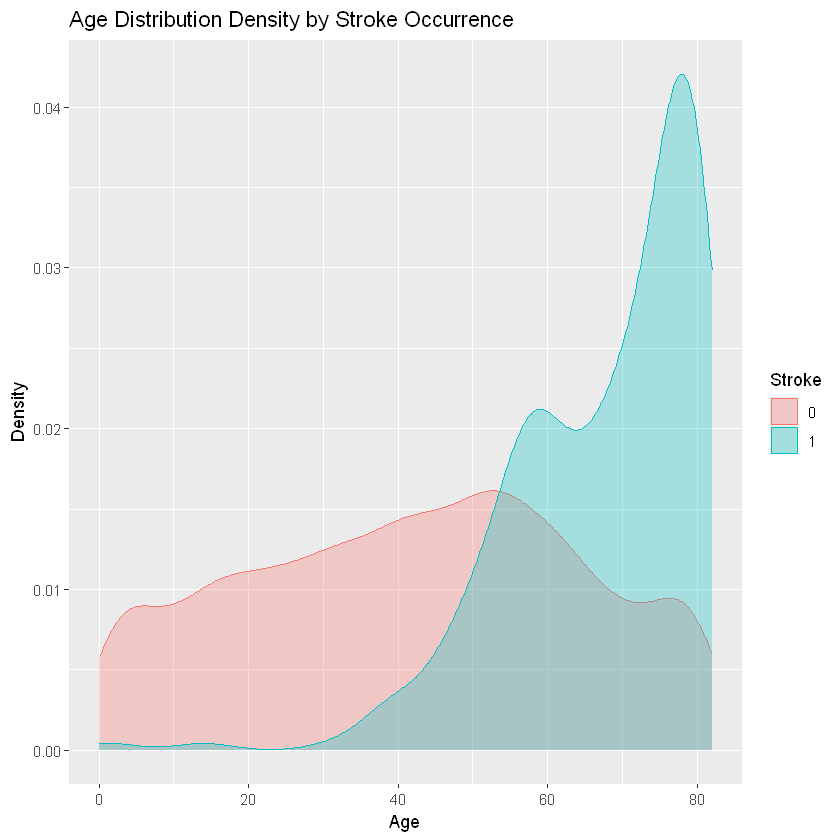

In [18]:
stroke_df <- stroke_df %>%
    mutate(age_group = case_when(
        age < 18 ~ "Children",
        age >= 18 & age < 40 ~ "Young Adults",
        age >= 40 & age < 60 ~ "Middle-Aged Adults",
        age >= 60 ~ "Elderly"
    ))

age_group_summary <- stroke_df %>%
    group_by(age_group) %>%
    summarize(
        total = n(),
        strokes = sum(stroke, na.rm = TRUE),
        stroke_rate = mean(stroke, na.rm = TRUE) * 100
    ) %>%
    arrange(desc(stroke_rate))

age_group_summary

ggplot(stroke_df, aes(x = age, color = factor(stroke), fill = factor(stroke))) +
  geom_density(alpha = 0.3) +
  labs(
    title = "Age Distribution Density by Stroke Occurrence",
    x = "Age",
    y = "Density",
    fill = "Stroke",
    color = "Stroke"
  )


As expected, elderly individuals are predominantly prone to strokes, with a stroke rate of 13.15%, while children have the lowest stroke rate at 0.23%. Middle-aged adults fall in between, with a moderate stroke rate of 3.83%. The density plot shows that strokes are heavily concentrated in individuals aged 60–80, confirming that age is a primary risk factor for stroke. This analysis highlights that individuals aged 60 and above are the most vulnerable to stroke occurrence.

#### BMI and Stroke Occurence
Like previously, we create categories but now based on the individuals BMI (e.g., Underweight, Normal, Overwe
ight, Obese), which are according to WHO classifications. Then we calculate stroke rates for each group and visualize BMI distributions for stroke vs. non-stroke.

bmi_category,total,strokes,stroke_rate
<chr>,<int>,<int>,<dbl>
Overweight,1409,75,5.3229241
Obese,1920,98,5.1041667
Normal,1243,35,2.8157683
Underweight,337,1,0.2967359


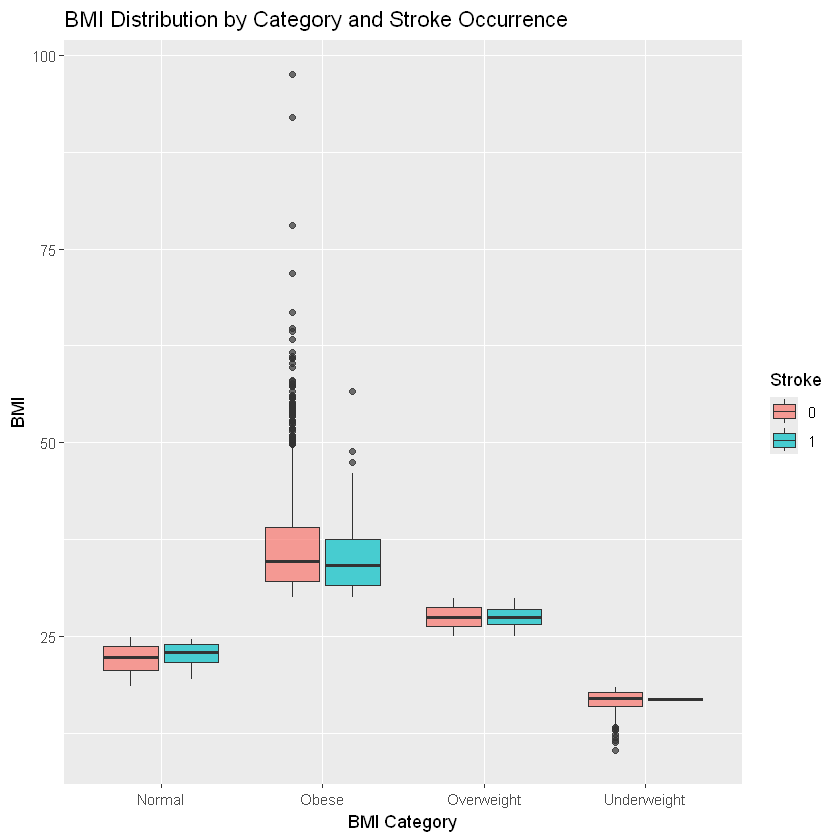

In [19]:
bmi_subgroups <- stroke_df_clean %>%
  mutate(
         bmi_category = case_when(
           bmi < 18.5 ~ "Underweight",
           bmi >= 18.5 & bmi < 25 ~ "Normal",
           bmi >= 25 & bmi < 30 ~ "Overweight",
           bmi >= 30 ~ "Obese"
         ))

bmi_category_summary <- bmi_subgroups %>%
  group_by(bmi_category) %>%
  summarize(
    total = n(),
    strokes = sum(stroke, na.rm = TRUE),
    stroke_rate = mean(stroke, na.rm = TRUE) * 100,
    .groups = "drop"
  ) %>%
  arrange(desc(stroke_rate))

bmi_category_summary

ggplot(bmi_subgroups, aes(x = bmi_category, y = bmi, fill = factor(stroke))) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "BMI Distribution by Category and Stroke Occurrence",
    x = "BMI Category",
    y = "BMI",
    fill = "Stroke"
  )

Stroke risk increases with BMI, with overweight individuals showing the highest stroke rate (5.32%), followed closely by obese individuals (5.10%). Normal-weight individuals have a lower stroke rate (2.82%), and underweight individuals have the lowest risk (0.30%). While BMI correlates with stroke occurrence, the overlap in distributions within BMI categories suggests it is a moderate predictor, and other factors likely contribute more strongly to stroke risk. 

#### Glucose levels and Stroke Status


# A tibble: 2 x 6
  stroke mean_glucose median_glucose sd_glucose max_glucose min_glucose
   <int>        <dbl>          <dbl>      <dbl>       <dbl>       <dbl>
1      0         105.           91.5       43.8        268.        55.1
2      1         133.          105.        61.9        272.        56.1
# A tibble: 2 x 4
  high_glucose                 total strokes stroke_rate
  <chr>                        <int>   <int>       <dbl>
1 Abnormal level (>125)         1000     100       10   
2 Below abnormal level (<=125)  4110     149        3.63


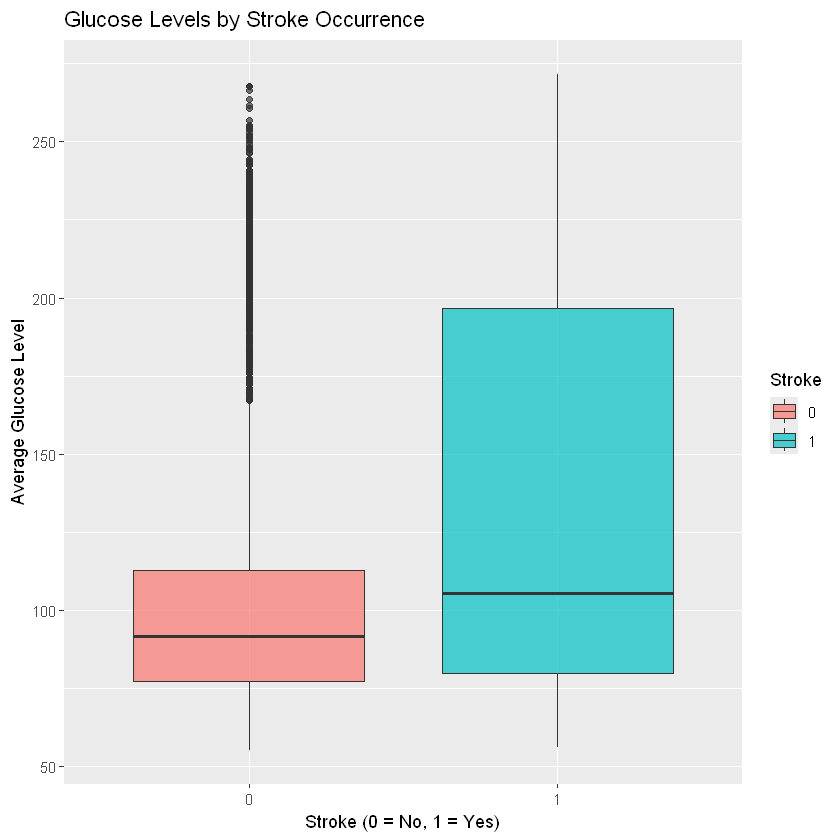

In [20]:
glucose_summary <- stroke_df %>%
    group_by(stroke) %>%
    summarize(
        mean_glucose = mean(avg_glucose_level, na.rm = TRUE),
        median_glucose = median(avg_glucose_level, na.rm = TRUE),
        sd_glucose = sd(avg_glucose_level, na.rm = TRUE),
        max_glucose = max(avg_glucose_level, na.rm = TRUE),
        min_glucose = min(avg_glucose_level, na.rm = TRUE),
        .groups = "drop"
    )

print(glucose_summary)

ggplot(stroke_df,
       aes(x = factor(stroke), y = avg_glucose_level, fill = factor(stroke))) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Glucose Levels by Stroke Occurrence",
    x = "Stroke (0 = No, 1 = Yes)",
    y = "Average Glucose Level",
    fill = "Stroke"
  )

stroke_df <- stroke_df %>%
  mutate(
      high_glucose = ifelse(avg_glucose_level > 125,
                            "Abnormal level (>125)",
                            "Below abnormal level (<=125)")
  )

# Summarize stroke rates for high vs. normal glucose
glucose_category_summary <- stroke_df %>%
  group_by(high_glucose) %>%
  summarize(
    total = n(),
    strokes = sum(stroke, na.rm = TRUE),
    stroke_rate = mean(stroke, na.rm = TRUE) * 100,
    .groups = "drop"
  )

print(glucose_category_summary)

From above, we see that individuals with higher glucose levels are at significantly increased risk of stroke. Stroke rate among individuals with abnormal glucose levels > 125 is approximately three times higher than the 3.63% rate for those with normal glucose levels. These results highlight the critical role of glucose management in reducing stroke risk.

## Data Preparation
### Cleaning Data
The task is to clean the dataset `cell_phones_total.csv`, specifically:

- Deal with missing values in a suitable way.
- Convert all the relevant cells to numbers (not strings).

We start by reading the data and check the structure of it.

In [21]:
cell_phones_df <- read.csv(
    "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv",
    fileEncoding = "UTF-8"
)

str(cell_phones_df)

'data.frame':	214 obs. of  57 variables:
 $ iso.3: chr  "ABW" "AFG" "AGO" "ALB" ...
 $ X1960: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1965: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1966: logi  NA NA NA NA NA NA ...
 $ X1967: logi  NA NA NA NA NA NA ...
 $ X1968: logi  NA NA NA NA NA NA ...
 $ X1969: logi  NA NA NA NA NA NA ...
 $ X1970: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1971: logi  NA NA NA NA NA NA ...
 $ X1972: logi  NA NA NA NA NA NA ...
 $ X1973: logi  NA NA NA NA NA NA ...
 $ X1974: logi  NA NA NA NA NA NA ...
 $ X1975: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1976: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1977: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1978: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1979: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1980: chr  "0" "0" "0" "0" ...
 $ X1981: chr  "0" "0" "0" "0" ...
 $ X1982: chr  "0" "0" "0" "0" ...
 $ X1983: chr  "0" "0" "0" "0" ...
 $ X1984: chr  "0" "0" "0" "0" ...
 $ X1985: chr  "0" "0" "0" "0" ...
 $ X1986: chr  "0" "0" "0" "0" ...
 $ X1987: chr  "0" "0" "0" "0" ...
 $ X1988: ch

Before converting all strings to numbers, we need to deal with all the observations that contain letters. To do this smoothly, we implement a function that uses `grepl()` and `sub()`. The `grepl()` function checks for pattern matches in strings, which we will use in our logical argument and the `sub()` function substitute a string or a character with a specific string. 

In [22]:
numeric_converter <- function(value) {
    if (grepl("k", value, ignore.case = TRUE)) {
        as.numeric(sub("k", "", value, ignore.case = TRUE)) * 1e3
    } else if (grepl("M", value, ignore.case = TRUE)) {
        as.numeric(sub("M", "", value, ignore.case = TRUE)) * 1e6
    } else if (grepl("B", value, ignore.case = TRUE)) {
        as.numeric(sub("B", "", value, ignore.case = TRUE)) * 1e9
    } else {
        as.numeric(value)
    }
}

Next step is to apply this function above. We do this by first extracting the columns we want to convert and then apply the function above together with `mutate()` and `across()` to efficiently transform the relevant columns.

In [23]:
char_columns <- cell_phones_df %>%
    select(where(is.character)) %>%
    select(-iso.3) %>% # Exclude iso-3
    colnames()

cell_phones_cleaned <- cell_phones_df %>%
    mutate(
        across(all_of(char_columns), ~ as.numeric(sapply(., numeric_converter)))
        )

str(cell_phones_cleaned)

'data.frame':	214 obs. of  57 variables:
 $ iso.3: chr  "ABW" "AFG" "AGO" "ALB" ...
 $ X1960: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1965: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1966: logi  NA NA NA NA NA NA ...
 $ X1967: logi  NA NA NA NA NA NA ...
 $ X1968: logi  NA NA NA NA NA NA ...
 $ X1969: logi  NA NA NA NA NA NA ...
 $ X1970: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1971: logi  NA NA NA NA NA NA ...
 $ X1972: logi  NA NA NA NA NA NA ...
 $ X1973: logi  NA NA NA NA NA NA ...
 $ X1974: logi  NA NA NA NA NA NA ...
 $ X1975: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1976: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1977: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1978: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1979: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1980: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1981: num  0 0 0 0 0 NA 0 0 0 0 ...
 $ X1982: num  0 0 0 0 0 2330 0 0 0 0 ...
 $ X1983: num  0 0 0 0 0 3560 0 0 0 0 ...
 $ X1984: num  0 0 0 0 0 4940 0 0 0 0 ...
 $ X1985: num  0 0 0 0 0 7920 0 0 0 0 ...
 $ X1986: num  0 0 0 0 0 11200 0 0 0 0 ...
 

The implementation seems to work so far. We can now focus on handling missing values. This will be done by imputating **Last Observation Carried Forward** (LOCF) method on all the numeric columns, which can be done by using `na.locf()` found in the package `zoo`. After that, we check whether there are still some missing values in the numeric columns.

In [24]:
library(zoo)

cell_phones_cleaned <- cell_phones_cleaned %>%
    mutate(
        across(where(is.numeric), ~ na.locf(., na.rm = FALSE))
    )

na_summary <- cell_phones_cleaned %>%
    summarize(across(everything(), ~ sum(is.na(.))))

print(na_summary)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




  iso.3 X1960 X1965 X1966 X1967 X1968 X1969 X1970 X1971 X1972 X1973 X1974 X1975
1     0     0     0   214   214   214   214     0   214   214   214   214     0
  X1976 X1977 X1978 X1979 X1980 X1981 X1982 X1983 X1984 X1985 X1986 X1987 X1988
1     0     0     0     0     0     0     0     0     0     0     0     0     0
  X1989 X1990 X1991 X1992 X1993 X1994 X1995 X1996 X1997 X1998 X1999 X2000 X2001
1     0     0     0     0     1     1     0     0     0     0     0     0     0
  X2002 X2003 X2004 X2005 X2006 X2007 X2008 X2009 X2010 X2011 X2012 X2013 X2014
1     0     0     0     0     0     0     0     0     0     1     0     0     0
  X2015 X2016 X2017 X2018 X2019
1     0     1     1     1     1


As we can see, there are still some missing values in the numeric columns. This is because the first entry in the columns are `NA`, which LOCF does not handle. Furthermore, we see that some columns only contains missing values (e.g., X1966-X1969, X1971-X1974) and  these columns are of type `logical`. We will fill the first entries using **Last Observation Carried Backward** and then remove the columns that only contain missing values.

In [25]:
cell_phones_cleaned <- cell_phones_cleaned %>%
    select(-where(is.logical)) %>%
    mutate(across(
        where(is.numeric),
        ~ na.locf(., na.rm = FALSE, fromLast = TRUE))
    )

na_summary <- cell_phones_cleaned %>%
    summarize(across(everything(), ~ sum(is.na(.))))

print(na_summary)

  iso.3 X1960 X1965 X1970 X1975 X1976 X1977 X1978 X1979 X1980 X1981 X1982 X1983
1     0     0     0     0     0     0     0     0     0     0     0     0     0
  X1984 X1985 X1986 X1987 X1988 X1989 X1990 X1991 X1992 X1993 X1994 X1995 X1996
1     0     0     0     0     0     0     0     0     0     0     0     0     0
  X1997 X1998 X1999 X2000 X2001 X2002 X2003 X2004 X2005 X2006 X2007 X2008 X2009
1     0     0     0     0     0     0     0     0     0     0     0     0     0
  X2010 X2011 X2012 X2013 X2014 X2015 X2016 X2017 X2018 X2019
1     0     0     0     0     0     0     0     0     0     0


We have successfully cleaned the data. Now we check whether we get the same table as the one displayed in the assignment.

In [26]:
verified_table <- cell_phones_cleaned %>%
    select(iso.3, X2015, X2016, X2017, X2018, X2019) %>%
    arrange(desc(X2015))

head(verified_table, n = 5)

,iso.3,X2015,X2016,X2017,X2018,X2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHN,1.29e+09,1.36e+09,1.47e+09,1.65e+09,1.73e+09
2,IND,1.00e+09,1.13e+09,1.17e+09,1.18e+09,1.15e+09
3,USA,3.82e+08,3.96e+08,4.00e+08,4.22e+08,4.78e+06
4,IDN,3.39e+08,3.86e+08,4.35e+08,3.19e+08,3.45e+08
5,BRA,2.58e+08,2.44e+08,2.18e+08,2.07e+08,2.55e+05
